In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow import random
import pandas as pd
import numpy as np

In [2]:
seed =1
random.set_seed(seed)
np.random.seed(seed)

model=Sequential()

In [3]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(MaxPool2D(2,2))

model.add(Flatten())

In [4]:
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",metrics='accuracy',optimizer='adam')

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_agu= ImageDataGenerator(rescale=1./225,
                         shear_range=.2,
                          zoom_range=.2,
                          horizontal_flip=True
                         )

test_agu=ImageDataGenerator(rescale=1./225)

In [6]:
training_set = train_agu.flow_from_directory('C:/Users/97155/Downloads/The-Deep-Learning-with-Keras-Workshop-master/The-Deep-Learning-with-Keras-Workshop-master/Chapter07/dataset/training_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

test_set = train_agu.flow_from_directory("C:/Users/97155/Downloads/The-Deep-Learning-with-Keras-Workshop-master/The-Deep-Learning-with-Keras-Workshop-master/Chapter07/dataset/test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.


In [8]:
model.fit_generator(training_set,
                         steps_per_epoch = 300,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 100,
                         shuffle=False)

Epoch 1/2


C:\Users\97155\AppData\Local\Temp\ipykernel_3924\1116426860.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set,


300/300 [==============================] - 82s 273ms/step - loss: 0.3830 - accuracy: 0.8322 - val_loss: 0.3783 - val_accuracy: 0.8328
Epoch 2/2
300/300 [==============================] - 68s 225ms/step - loss: 0.3595 - accuracy: 0.8426


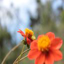

In [39]:
from keras.preprocessing import image
from PIL import Image


new_image= Image.open('C:/Users/97155/Downloads/The-Deep-Learning-with-Keras-Workshop-master/The-Deep-Learning-with-Keras-Workshop-master/Chapter07/test_image_2.jpg',
                         )
new_image = new_image.resize((64, 64))
new_image

In [40]:
training_set.class_indices

{'car': 0, 'flower': 1}

In [41]:
import numpy as np

new_image = np.array(new_image)
new_image=np.expand_dims(new_image,axis=0)
result = model.predict(new_image ,verbose=0)

if result[0][0]==1:
    pre="It is a flower "
else:
    pre="It is a car"
        
print(pre)


It is a flower 
